In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/data_modified.csv',parse_dates=['date'])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [26]:
# Step 3 & 4: Update Feature Set and Split Data

# Define features (X) and target (y)
# Include the new engineered features and exclude 'date', 'yr_built', 'yr_renovated'
X = df_encoded.drop(['price', 'date', 'yr_built', 'yr_renovated'], axis=1)
y = df_encoded['price']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split successfully.")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Data split successfully.
Training features shape: (3680, 4655)
Testing features shape: (920, 4655)
Training target shape: (3680,)
Testing target shape: (920,)


In [22]:
# Step 5: Retrain Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model retrained successfully.")

Linear Regression model retrained successfully.


In [23]:
# Step 6: Evaluate Model
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.03535608634886813
R-squared (R²): -3.58621039577649


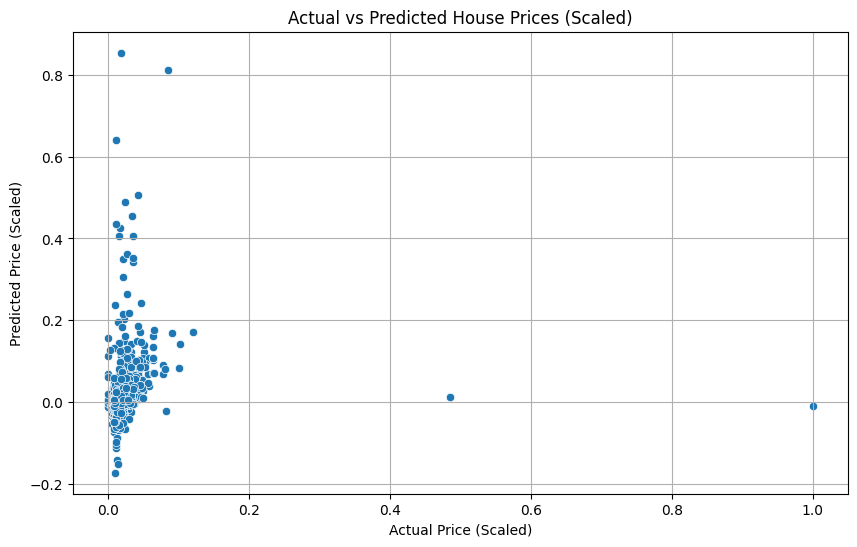

In [24]:
# Step 1: Plot Predicted vs Actual Prices
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price (Scaled)")
plt.ylabel("Predicted Price (Scaled)")
plt.title("Actual vs Predicted House Prices (Scaled)")
plt.grid(True)
plt.show()

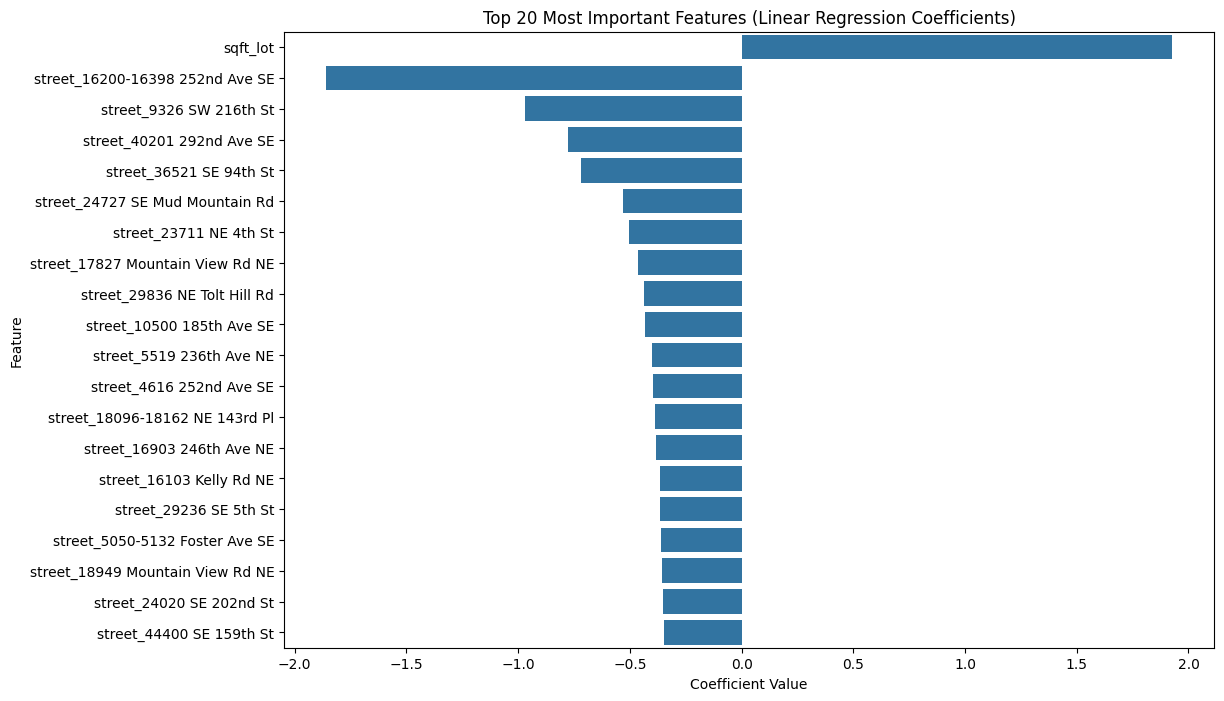

In [25]:
# Step 2: Plot Feature Coefficients
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the coefficients and feature names
coefficients = model.coef_
feature_names = X_train.columns

# Create a DataFrame to easily sort and plot
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by absolute coefficient value to see most impactful features
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(20) # Display top 20

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Top 20 Most Important Features (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()